DATA DESCRIPTION

For the development of this project, a group of images hosted in a free online database will be used.
This database has four different directories holding the images in different levels of difficulty as follows: faces94, faces95, faces96 and grimace. The last two are more complicated due to the images’ variation on background and scale and the type of facial expressions in them.

The whole set has 7900 images belonged to 395 individuals. Different genders and races are shown, people wearing glasses and beards are also taken into account and, regarding the age range, the majority of the data corresponds to first year undergraduate students between 18 and 20 years old, even though some older people are present in the data as well.

The main features of each directory containing the images are mentioned below:

Faces94: this is a collection of images consisting in a wide range of people’s pictures taken while they spoke in front of the camera. Because of the speech, this set is an introduction to the variation on facial expression.
Faces94 has 153 individuals’ images using portrait format, it contains pictures of male, female and malestaff in separate directories. The pictures’ background is plain green. It does not have any individual’s variation on head scale and image lighting, but it does have a few on head turn, tilt and slant, and considerable on facial expression.
Additionally, there is no individual hairstyle variation as the images were taken in a single session.

Faces95: this is a collection of pictures taken while people took one step forward towards the camera. This movement is used to introduce important variations on head scale among the same individual’s images.
Faces95 holds 72 people’s images in portrait format, male and female subjects are shown. The background in these images consists of a red curtain. Due to the subjects’ movement at the shooting time, there is some variations on picture’s backgrounds caused by people’s shadows, and also on head scale and image lighting.
Some variation is present on facial expression and there is no individual hairstyle variation neither, as the images in this directory were also taken in a single session.

Faces96: this collection of facial images holds subjects’ pictures taken while people took one step forward towards the camera as in Faces95. This movement is also used to introduce important variations on head scale among the same individual’s images.
This dataset contains 152 individuals’ images in square format and has male and female subjects’ pictures. The background used this time, consists of glossy posters which makes it more complicated than the ones used in Faces94 and Faces95. It has a large variation on head scale and image lighting. It also presents some minor variation on the position of the face in the image, on head turn, tilt and slant and on facial expression.
In this set, there is no hairstyle variation neither, as the images were taken in a single session.

Grimace: this directory has a collection of subject images taken while people move their heads and make grimaces which get more extreme near the end of the sequence. The other features are similar to those in Faces95.  
The number of participants in this dataset is 18 people. The whole set of images is presented in portrait format and it contains images of female and male subjects. The background used in this pictures is plain and there is a very little variation on head scale and image lighting, a bit more on head turn, tilt and slant and a big variation on facial expression.
As in the other directories, there is no hairstyle variation in here, as the images were taken in a single session as well.

References

University of Essex. (2008, June 20). Description of the Collection of Facial Images [online]. Retrieved from https://cswww.essex.ac.uk/mv/allfaces/index.html


In [1]:
import sys
sys.path.append('../utils/')

In [2]:
from ImageUtils import *

In [3]:
import numpy as np
import pandas as pd # Needs the package Pandas to be installed. Check Anaconda Environments and Packages.
from sklearn.decomposition import PCA # Needs SciKit Learn package to be installed. Check Anaconda Environments and Packages.
import matplotlib.pyplot as plt

In [9]:
face94_male = readFaces94MaleFaces(gray=True)

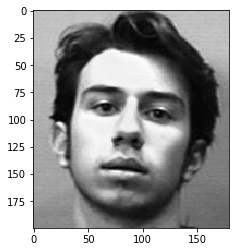

In [7]:
plt.imshow(face94_male[0], plt.cm.gray)

In [30]:
N, height, width = face94_male.shape

In [31]:
pca = PCA(n_components=200, whiten=True).fit(face94_male.reshape(N, height*width))

In [32]:
pca.components_.shape

(200, 36000)

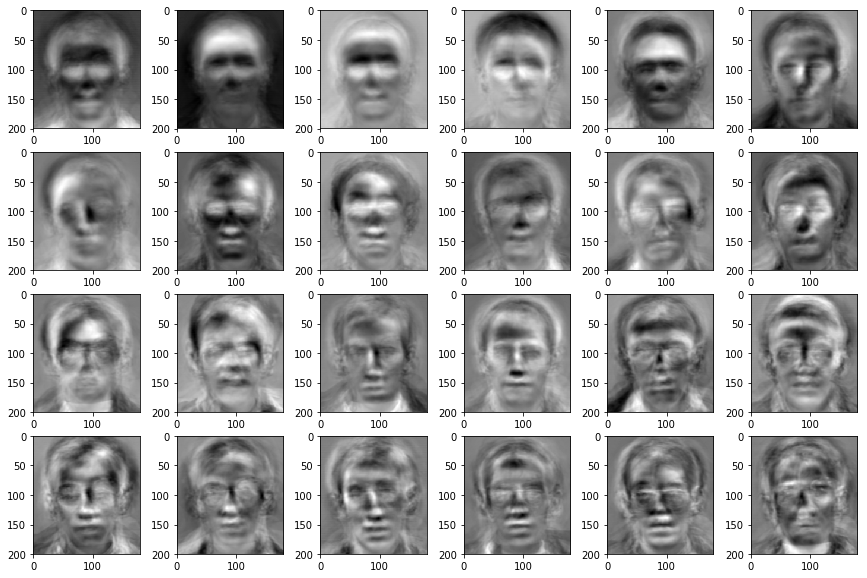

In [33]:
rows = 4
cols = 6
plt.figure(figsize=(15,10))
for i in np.arange(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(pca.components_[i].reshape(height, width), plt.cm.gray)

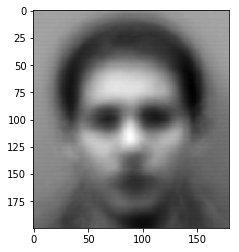

In [34]:
plt.imshow(pca.mean_.reshape(height, width), plt.cm.gray)

In [35]:
median_face = np.median(face94_male.reshape(N, height*width), axis=0)

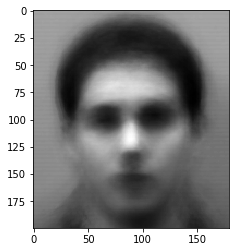

In [36]:
plt.imshow(median_face.reshape(height, width), cmap=plt.cm.gray)

In [37]:
face94_male_projected = pca.transform(face94_male.reshape(N, height*width))

# Images of natual landscapes

The landscape images were obtain of **ImageNet** database [ImageNet database](http://image-net.org/) , 
each one of the directions is [online](http://image-net.org/api/text/imagenet.synset.geturls?wnid=n13104059). We use cv2 package by read and resize images, then we create an Numpy array with a gray scale of images.

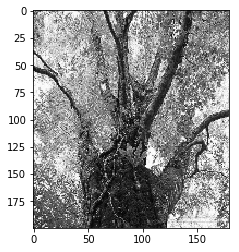

In [4]:
landscape = readLandsCapeImage(gray=True) # Read dataset
plt.imshow(landscape[45], plt.cm.gray) # show image